In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [105]:
from seirsplus.networks import generate_demographic_contact_network, household_country_data
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

# Not setting max_dt, which defaults to model.T

In [122]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.001)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10

Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [123]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
)

In [124]:
for i in range(1000):
    if test_model.X[i] == test_model.E:
        print(i)

926


In [125]:
sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 15,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]


Running simulation with seed 0 for strategy correlated...


In [126]:
sim_correlated.run_simulation()

# Note: why is model.run_iteration() happening every 0.01 days in the beginning?
# -- this is because tau is set to 0.01 when propensity sums to 0

calling model.run_iteration(), time:  0
    Nodes with transition propensities:
    propensities.sum():  0.0
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.96it/s]


Screening day:  0  self.model.t:  0.01
calling model.run_iteration(), time:  0.01
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.02
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.03
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.04
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.05
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.060000000000000005
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.07
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.08
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.09
    No

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.02it/s]


Screening day:  1  self.model.t:  1.0000000000000007
calling model.run_iteration(), time:  1.0000000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0100000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0200000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0300000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0400000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0500000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0600000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0700000000000007
    Node

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.18it/s]


Screening day:  2  self.model.t:  2.0000000000000013
calling model.run_iteration(), time:  2.0000000000000013
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.010000000000001
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.020000000000001
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.0300000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.0400000000000005
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.0500000000000003
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.06
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.07
    Nodes with transition propensities

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.84it/s]


Screening day:  3  self.model.t:  3.00999999999998
calling model.run_iteration(), time:  3.00999999999998
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0199999999999796
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0299999999999794
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.039999999999979
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.049999999999979
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0599999999999787
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0699999999999785
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0799999999999783
    Nodes with

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 38.23it/s]


Screening day:  4  self.model.t:  4.009999999999959
calling model.run_iteration(), time:  4.009999999999959
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.019999999999959
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.0299999999999585
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.039999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.049999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.059999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.069999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.079999999999957
    Nodes with t

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 61.70it/s]


Screening day:  5  self.model.t:  5.009999999999938
calling model.run_iteration(), time:  5.009999999999938
    Nodes with transition propensities:
        node926, in state [2], propensity [('EtoIPRE', 100000.0)]
    propensities.sum():  100000.0
    propensities sum to >0
    tau:  2.124151662000651e-06
{'t': 5.010002124151599, 'transitionNode': 926, 'transitionNodeVL': 5.010002124151599, 'transitionType': 'EtoIPRE'}


calling model.run_iteration(), time:  5.010002124151599
    Nodes with transition propensities:
        node545, in state [1], propensity [('StoE', 999999999.88)]
        node546, in state [1], propensity [('StoE', 999999999.86)]
        node547, in state [1], propensity [('StoE', 999999999.94)]
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.4

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.19it/s]


Screening day:  6  self.model.t:  20.010002125343927
Running screening for group 7 on day 7...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 41.50it/s]


Screening day:  7  self.model.t:  20.010002125343927
Running screening for group 8 on day 8...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 30.83it/s]


Screening day:  8  self.model.t:  20.010002125343927
Running screening for group 9 on day 9...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 61.80it/s]


Screening day:  9  self.model.t:  20.010002125343927
Running screening for group 0 on day 10...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.66it/s]


Screening day:  10  self.model.t:  20.010002125343927
Running screening for group 1 on day 11...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 28.70it/s]


Screening day:  11  self.model.t:  20.010002125343927
Running screening for group 2 on day 12...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.43it/s]


Screening day:  12  self.model.t:  20.010002125343927
Running screening for group 3 on day 13...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 40.94it/s]


Screening day:  13  self.model.t:  20.010002125343927
Running screening for group 4 on day 14...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 21.54it/s]


Screening day:  14  self.model.t:  20.010002125343927
Running screening for group 5 on day 15...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 31.08it/s]


Screening day:  15  self.model.t:  20.010002125343927
Running screening for group 6 on day 16...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.00it/s]


Screening day:  16  self.model.t:  20.010002125343927
Running screening for group 7 on day 17...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.99it/s]


Screening day:  17  self.model.t:  20.010002125343927
Running screening for group 8 on day 18...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 25.82it/s]


Screening day:  18  self.model.t:  20.010002125343927
Running screening for group 9 on day 19...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.79it/s]


Screening day:  19  self.model.t:  20.010002125343927
Running screening for group 0 on day 20...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.57it/s]


Screening day:  20  self.model.t:  20.010002125343927
calling model.run_iteration(), time:  20.010002125343927
    Nodes with transition propensities:
        node545, in state [2], propensity [('EtoIPRE', 100000.0)]
        node546, in state [2], propensity [('EtoIPRE', 100000.0)]
        node547, in state [2], propensity [('EtoIPRE', 100000.0)]
        node925, in state [2], propensity [('EtoIPRE', 100000.0)]
        node926, in state [13], propensity [('QPREtoQSYM', 100000.0)]
        node927, in state [2], propensity [('EtoIPRE', 100000.0)]
    propensities.sum():  600000.0
    propensities sum to >0
    tau:  4.2446104760758746e-08
{'t': 20.01000216779003, 'transitionNode': 925, 'transitionNodeVL': 12.0, 'transitionType': 'EtoIPRE'}




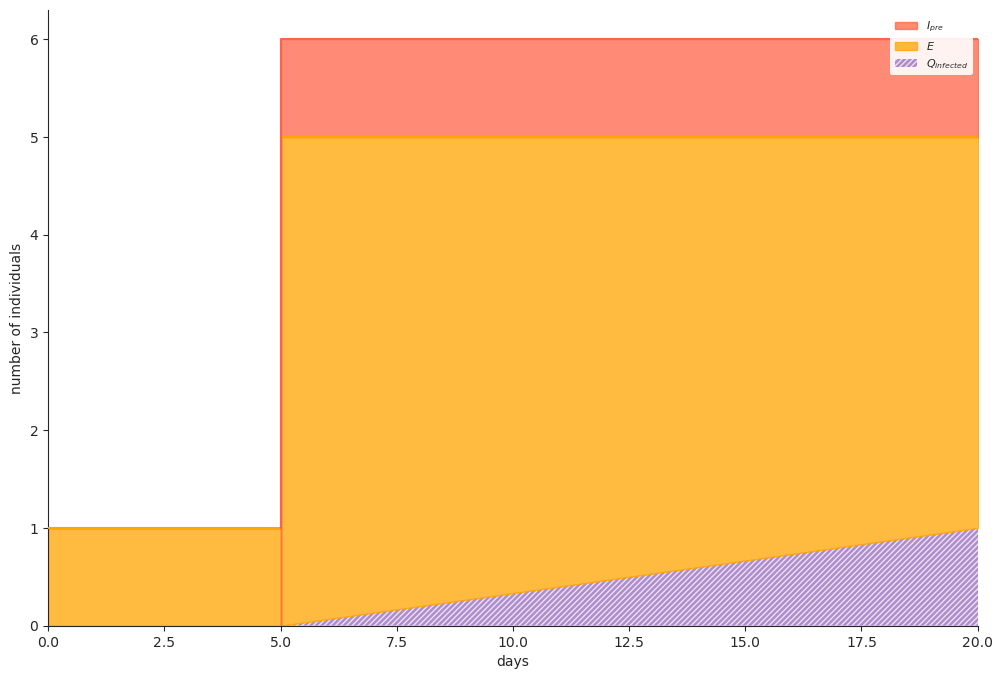

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [127]:
sim_correlated.model.figure_infections(plot_percentages=False)

In [128]:
sim_correlated.model.transitions_log

[{'t': 5.010002124151599,
  'transitionNode': 926,
  'transitionNodeVL': 5.010002124151599,
  'transitionType': 'EtoIPRE'},
 {'t': 5.0100021242051485,
  'transitionNode': 925,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124242381,
  'transitionNode': 546,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.0100021243415185,
  'transitionNode': 547,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124667663,
  'transitionNode': 545,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002125343928,
  'transitionNode': 927,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 20.01000216779003,
  'transitionNode': 925,
  'transitionNodeVL': 12.0,
  'transitionType': 'EtoIPRE'}]

# Now set max_dt = 1, ie., when tau exceeds max_dt, the model increments by max_dt in time but does not run any transition

In [129]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.001)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10

test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 15,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
    max_dt = 1
)

sim_correlated.run_simulation()



Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:03<00:00,  3.17it/s]


Running simulation with seed 0 for strategy correlated...
calling model.run_iteration(), time:  0
    Nodes with transition propensities:
    propensities.sum():  0.0
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.27it/s]


Screening day:  0  self.model.t:  0.01
calling model.run_iteration(), time:  0.01
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.02
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.03
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.04
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.05
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.060000000000000005
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.07
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.08
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.09
    No

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.58it/s]


Screening day:  1  self.model.t:  1.0000000000000007
calling model.run_iteration(), time:  1.0000000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0100000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0200000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0300000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0400000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0500000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0600000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0700000000000007
    Node

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.67it/s]


Screening day:  2  self.model.t:  2.0000000000000013
calling model.run_iteration(), time:  2.0000000000000013
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.010000000000001
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.020000000000001
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.0300000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.0400000000000005
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.0500000000000003
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.06
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  2.07
    Nodes with transition propensities

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.39it/s]


Screening day:  3  self.model.t:  3.00999999999998
calling model.run_iteration(), time:  3.00999999999998
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0199999999999796
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0299999999999794
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.039999999999979
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.049999999999979
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0599999999999787
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0699999999999785
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  3.0799999999999783
    Nodes with

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 38.14it/s]


Screening day:  4  self.model.t:  4.009999999999959
calling model.run_iteration(), time:  4.009999999999959
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.019999999999959
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.0299999999999585
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.039999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.049999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.059999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.069999999999958
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  4.079999999999957
    Nodes with t

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.10it/s]


Screening day:  5  self.model.t:  5.009999999999938
calling model.run_iteration(), time:  5.009999999999938
    Nodes with transition propensities:
        node926, in state [2], propensity [('EtoIPRE', 100000.0)]
    propensities.sum():  100000.0
    propensities sum to >0
    tau:  2.124151662000651e-06
{'t': 5.010002124151599, 'transitionNode': 926, 'transitionNodeVL': 5.010002124151599, 'transitionType': 'EtoIPRE'}


calling model.run_iteration(), time:  5.010002124151599
    Nodes with transition propensities:
        node545, in state [1], propensity [('StoE', 999999999.88)]
        node546, in state [1], propensity [('StoE', 999999999.86)]
        node547, in state [1], propensity [('StoE', 999999999.94)]
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.4

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 48.61it/s]


Screening day:  6  self.model.t:  6.010002125343928
calling model.run_iteration(), time:  6.010002125343928
    Nodes with transition propensities:
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.499999998e-11)]
        node896, in state [1], propensity [('StoE', 1.6666666662777778e-11)]
    propensities.sum():  0.017195767262433864
    propensities sum to >0
    tau:  8.768504750682048
Running screening for group 7 on day 7...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.44it/s]


Screening day:  7  self.model.t:  7.010002125343928
calling model.run_iteration(), time:  7.010002125343928
    Nodes with transition propensities:
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.499999998e-11)]
        node896, in state [1], propensity [('StoE', 1.6666666662777778e-11)]
        node926, in state [3], propensity [('IPREtoISYM', 100000.0)]
    propensities.sum():  100000.01719576726
    propensities sum to >0
    tau:  9.592623047100553e-06
{'t': 7.010011717966975, 'transitionNode': 926, 'transitionNodeVL': 7.010011717966975, 'transitionType': 'IPREtoISYM'}


calling model.run_iteration(), time:  7.010011717966975
    Nodes with transition propensities:
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, i

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.22it/s]


Screening day:  8  self.model.t:  8.010011717966975
calling model.run_iteration(), time:  8.010011717966975
    Nodes with transition propensities:
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.499999998e-11)]
        node896, in state [1], propensity [('StoE', 1.6666666662777778e-11)]
    propensities.sum():  0.017195767262433864
    propensities sum to >0
    tau:  161.41063177694386
Running screening for group 9 on day 9...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.74it/s]


Screening day:  9  self.model.t:  9.010011717966975
calling model.run_iteration(), time:  9.010011717966975
    Nodes with transition propensities:
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.499999998e-11)]
        node896, in state [1], propensity [('StoE', 1.6666666662777778e-11)]
    propensities.sum():  0.017195767262433864
    propensities sum to >0
    tau:  55.98662227965734
Running screening for group 0 on day 10...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 26.82it/s]


Screening day:  10  self.model.t:  10.010011717966975
calling model.run_iteration(), time:  10.010011717966975
    Nodes with transition propensities:
        node545, in state [2], propensity [('EtoIPRE', 100000.0)]
        node546, in state [2], propensity [('EtoIPRE', 100000.0)]
        node547, in state [2], propensity [('EtoIPRE', 100000.0)]
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.499999998e-11)]
        node896, in state [1], propensity [('StoE', 1.6666666662777778e-11)]
        node925, in state [2], propensity [('EtoIPRE', 100000.0)]
        node927, in state [2], propensity [('EtoIPRE', 100000.0)]
    propensities.sum():  500000.01719576726
    propensities sum to >0
    tau:  2.7712400095300465e-06
{'t': 10.010014489206984, 'transitionNode': 5

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.72it/s]


Screening day:  11  self.model.t:  11.010032122218439
calling model.run_iteration(), time:  11.010032122218439
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.13it/s]


Screening day:  12  self.model.t:  12.010034547999359
calling model.run_iteration(), time:  12.010034547999359
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.01it/s]


Screening day:  13  self.model.t:  13.010069743864168
calling model.run_iteration(), time:  13.010069743864168
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  13.020069743864168
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 32.54it/s]


Screening day:  14  self.model.t:  14.020069743864168
calling model.run_iteration(), time:  14.020069743864168
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.12it/s]


Screening day:  15  self.model.t:  15.020069743864168
calling model.run_iteration(), time:  15.020069743864168
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.39it/s]


Screening day:  16  self.model.t:  16.02006974386417
calling model.run_iteration(), time:  16.02006974386417
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [('S

In [130]:
sim_correlated.model.transitions_log

[{'t': 5.010002124151599,
  'transitionNode': 926,
  'transitionNodeVL': 5.010002124151599,
  'transitionType': 'EtoIPRE'},
 {'t': 5.0100021242051485,
  'transitionNode': 925,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124242381,
  'transitionNode': 546,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.0100021243415185,
  'transitionNode': 547,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124667663,
  'transitionNode': 545,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002125343928,
  'transitionNode': 927,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 7.010011717966975,
  'transitionNode': 926,
  'transitionNodeVL': 7.010011717966975,
  'transitionType': 'IPREtoISYM'},
 {'t': 10.010014489206984,
  'transitionNode': 545,
  'transitionNodeVL': 5.000012364539322,
  'transitionType': 'EtoIPRE'},
 {'t': 10.010015644417624,
  'transitionNode': 547,
  'transitionNodeVL': 5.00001352007

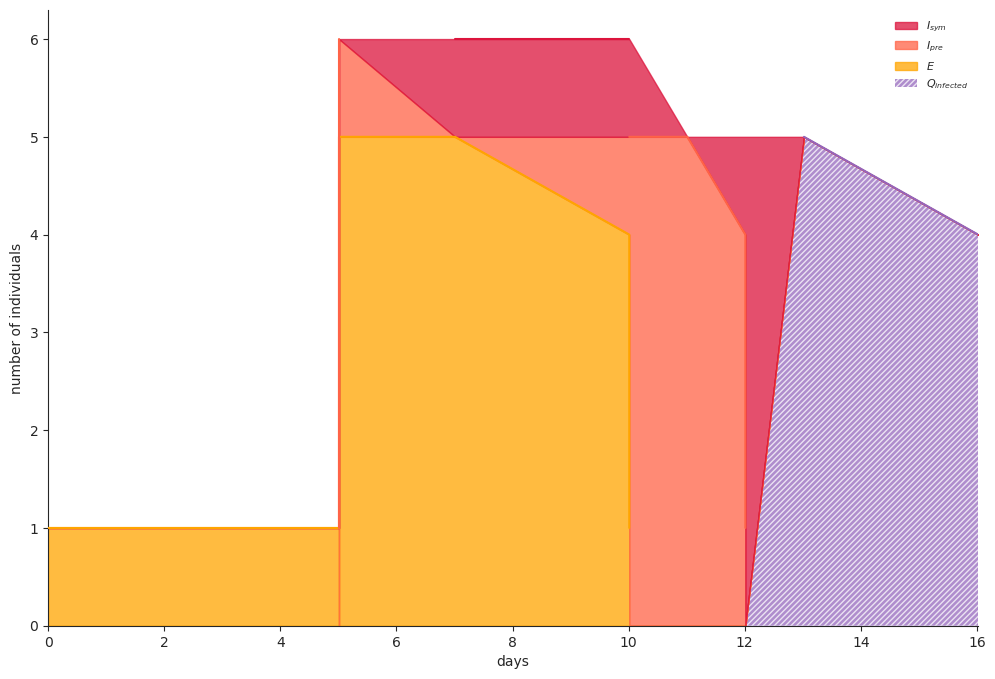

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [131]:
sim_correlated.model.figure_infections(plot_percentages=False)

# Below is scratchwork for understanding why there are small fractional propensity values, please do not delete for now

In [82]:
in_I[924:927]

array([[False],
       [ True],
       [False]])

In [84]:
sim_correlated.model.X[[545, 546, 547, 836, 926, 927, 932]]

array([[ 2],
       [ 2],
       [ 2],
       [ 1],
       [13],
       [ 2],
       [ 1]])

In [79]:
res.shape

(1000, 1)

In [78]:
for i in range(1000):
    if res[i] != 0:
        print(i, res[i], sim_correlated.model.X[i])

545 [5.e+19] [2]
546 [5.e+19] [2]
547 [5.e+19] [2]
836 [0.5] [1]
926 [5.e+19] [13]
927 [5.e+19] [2]
932 [0.5] [1]


In [70]:
len(sim_correlated.model.numE)

509

In [75]:
sum(sim_correlated.model.transmissionTerms_I)

array([0.])

In [72]:

np.any(sim_correlated.model.numI_sym[sim_correlated.model.tidx]) or np.any(sim_correlated.model.numI_asym[sim_correlated.model.tidx]) or np.any(sim_correlated.model.numI_pre[sim_correlated.model.tidx])

True

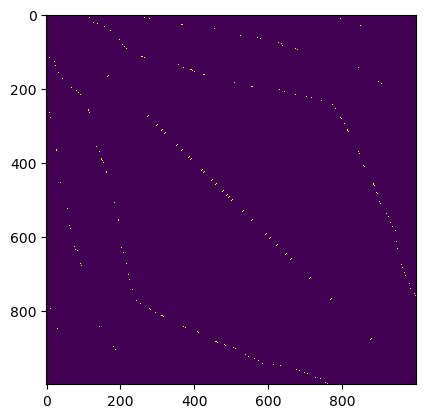

In [55]:
plt.imshow(sim_correlated.model.A.toarray(), cmap='viridis',  interpolation='nearest')

In [50]:
np.max(sim_correlated.model.A.toarray())

10000000000

In [59]:
sim_correlated.model.beta_local.shape

(1000, 1)

In [62]:
np.max(
    scipy.sparse.csr_matrix.multiply(sim_correlated.model.A, sim_correlated.model.beta_local.T).toarray()
)

5000000000.0

In [63]:
scipy.sparse.csr_matrix.multiply(sim_correlated.model.A, sim_correlated.model.beta_local.T).toarray().shape


(1000, 1000)

(array([997728.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   2272.]),
 array([0.0e+00, 5.0e+18, 1.0e+19, 1.5e+19, 2.0e+19, 2.5e+19, 3.0e+19,
        3.5e+19, 4.0e+19, 4.5e+19, 5.0e+19]),
 <BarContainer object of 10 artists>)

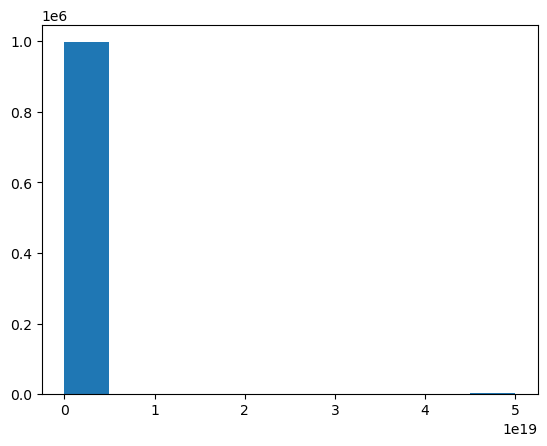

In [67]:
sim_correlated.model.A_deltabeta.toarray().flatten()
plt.hist()

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

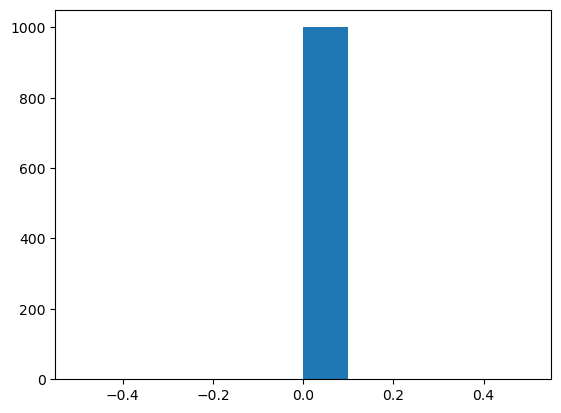

In [69]:
plt.hist(sim_correlated.model.transmissionTerms_I)

In [16]:
sim_correlated.model.transitions_log

[{'t': 5.010002124151599,
  'transitionNode': 926,
  'transitionNodeVL': 5.010002124151599,
  'transitionType': 'EtoIPRE'},
 {'t': 5.0100021242051485,
  'transitionNode': 925,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124242381,
  'transitionNode': 546,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.0100021243415185,
  'transitionNode': 547,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124667663,
  'transitionNode': 545,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002125343928,
  'transitionNode': 927,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 20.01000216779003,
  'transitionNode': 925,
  'transitionNodeVL': 12.0,
  'transitionType': 'EtoIPRE'}]

In [28]:
res = []
for l in sim_correlated.model.transitions_log:
    if l["transitionNode"] == 926:
        res.append(l)

In [29]:
res

[{'t': 5.010002124151599,
  'transitionNode': 926,
  'transitionNodeVL': 5.010002124151599,
  'transitionType': 'EtoIPRE'}]

In [22]:
prop, cols = test_model.calc_propensities()

In [24]:
for col, p in zip(cols, prop[926]):
    print(col, p)

StoE 0.0
EtoIPRE 0.0
IPREtoISYM 0.0
IPREtoIASYM 0.0
ISYMtoR 0.0
ISYMtoH 0.0
IASYMtoR 0.0
HtoR 0.0
HtoF 0.0
StoQS 0.0
EtoQE 0.0
IPREtoQPRE 0.0
ISYMtoQSYM 0.0
IASYMtoQASYM 0.0
QStoQE 0.0
QEtoQPRE 0.0
QPREtoQSYM 100000.0
QPREtoQASYM 0.0
QSYMtoQR 0.0
QSYMtoH 0.0
QASYMtoQR 0.0
RtoS 0.0
_toS 0.0


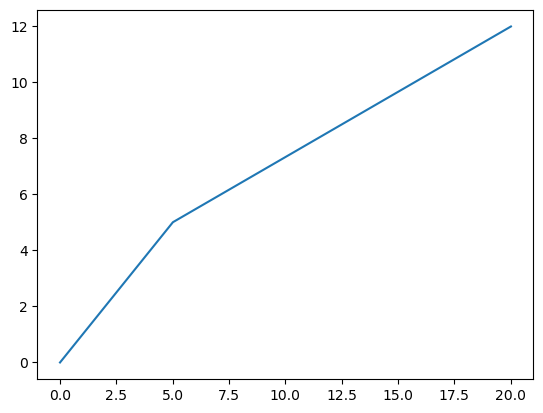

In [27]:
plt.plot(test_model.VL_over_time["time_points"], test_model.VL_over_time["VL_time_series"][926])

In [12]:
from collections import Counter

Counter(list(test_model.X.flatten()))

Counter({1: 994, 2: 4, 3: 1, 13: 1})

In [13]:
(test_model.X ==test_model.Q_pre)[926]

array([ True])

In [96]:
for i in range(1000):
    if test_model.X[i] == test_model.E:
        print(i)

545
546
547
927


In [17]:
for i in range(1000):
    if test_model.X[i] == test_model.I_pre:
        print(i)

925


In [18]:
for i in range(1000):
    if test_model.X[i] == test_model.Q_pre:
        print(i)

926


In [19]:
test_model.lamda_Q[926]

array([0.5])

In [20]:
test_model.timer_state[926]

array([15.00000004])

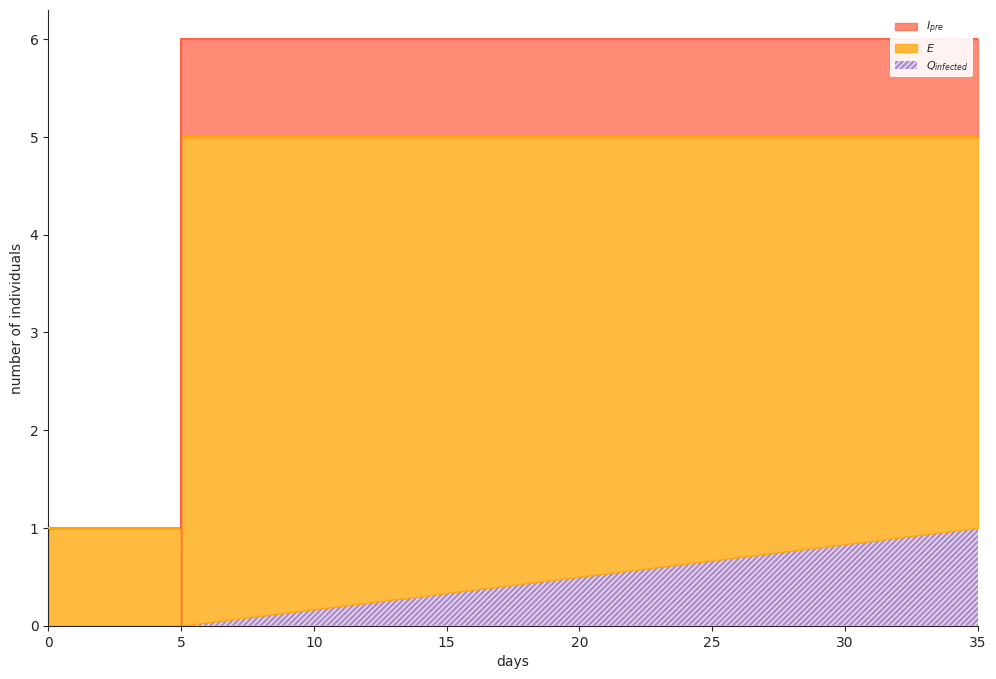

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot: xlabel='days', ylabel='number of individuals'>)

In [56]:
sim_correlated.model.figure_infections(plot_percentages=False)

In [57]:
sim_correlated.model.tseries

array([0.00000000e+00, 1.00000000e-02, 2.00000000e-02, 3.00000000e-02,
       4.00000000e-02, 5.00000000e-02, 6.00000000e-02, 7.00000000e-02,
       8.00000000e-02, 9.00000000e-02, 1.00000000e-01, 1.10000000e-01,
       1.20000000e-01, 1.30000000e-01, 1.40000000e-01, 1.50000000e-01,
       1.60000000e-01, 1.70000000e-01, 1.80000000e-01, 1.90000000e-01,
       2.00000000e-01, 2.10000000e-01, 2.20000000e-01, 2.30000000e-01,
       2.40000000e-01, 2.50000000e-01, 2.60000000e-01, 2.70000000e-01,
       2.80000000e-01, 2.90000000e-01, 3.00000000e-01, 3.10000000e-01,
       3.20000000e-01, 3.30000000e-01, 3.40000000e-01, 3.50000000e-01,
       3.60000000e-01, 3.70000000e-01, 3.80000000e-01, 3.90000000e-01,
       4.00000000e-01, 4.10000000e-01, 4.20000000e-01, 4.30000000e-01,
       4.40000000e-01, 4.50000000e-01, 4.60000000e-01, 4.70000000e-01,
       4.80000000e-01, 4.90000000e-01, 5.00000000e-01, 5.10000000e-01,
       5.20000000e-01, 5.30000000e-01, 5.40000000e-01, 5.50000000e-01,
      